In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
dataset = pd.read_csv('cmc.csv')
dataset.head(5)

,wifeAge,wifeEducation,husbandEducation,children,wifeReligion,wifeWorking,husbandOccupation,stdLiving,mediaExposure,contraceptiveMethod
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
y = dataset['contraceptiveMethod'].values

dataset = dataset.drop(['contraceptiveMethod'], axis=1)
X = dataset.values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
result = pd.DataFrame()
result['feature'] = dataset.columns
result['importance'] = forest.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

,feature,importance
0,wifeAge,0.349325
3,children,0.227783
6,husbandOccupation,0.089501
7,stdLiving,0.089312
1,wifeEducation,0.082592
2,husbandEducation,0.065574
5,wifeWorking,0.044941
4,wifeReligion,0.034456
8,mediaExposure,0.016516


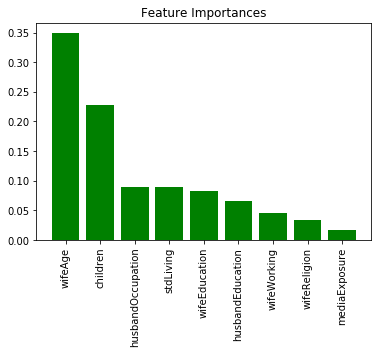

In [7]:
plt.title('Feature Importances')
plt.bar(range(len(result['feature'])), result['importance'], color='green', align='center')
plt.xticks(range(len(result['feature'])), result['feature'], rotation=90)

plt.show()